# Analyzing Covid-19 Data in the US
## Lauren DeMarco & Gayathri Nair
### December 16th, 2022


Our project focuses on a data set about demographic, public health and other relevant predictors for COVID-19 per state. We wanted to understand if there different predictors of Covid-19 that have relationships with each other. Some of the relationships we looked into include: common closure dates, relationship between income and infected population, relationship between population and number of ICU beds, relationship between income and health spending, highest infected states in the U.S, and average percentage of infection of different age ranges. We believe analysing a data set about Covid-19 can provide insight on larger problems in the United States. For example, understanding if there is a relationship between income and health spending during the Covid-19 period can show if there is a larger scale issue with healthcare and low-income. Overall, data analysis is a crucial method that provides comprehensive insight as to how our society functions and it can help us change potential issues.

Source of Data: https://www.kaggle.com/datasets/nightranger77/covid19-state-data?resource=download

In [36]:
import pandas as pd

covid19_states = pd.read_csv("covid19_states.csv", low_memory = False) #the low memory accounts for the low memory of panda and it allows for more data to be processed
covid19_states

#done by Lauren

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.60,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.80,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.40,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.30,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.40,95.0,0.33,0.40,0.26,03/19/20
5,Colorado,2034795,109910,2105,5845526,56.4011,0.4586,1597,56846,63882,...,89,6804,6.7,1.0,45.10,86.2,0.33,0.40,0.27,03/23/20
6,Connecticut,2367994,73858,4627,3563077,735.8689,0.4945,674,74561,76342,...,32,9859,7.2,1.0,49.00,88.0,0.30,0.38,0.32,03/17/20
7,District of Columbia,528174,17438,647,720687,11814.5410,0.5420,314,47285,200277,...,10,11944,9.8,0.0,54.65,100.0,0.30,0.48,0.22,03/16/20
8,Delaware,565983,25311,710,982895,504.3073,0.4522,186,51449,77253,...,7,10254,8.3,0.0,55.30,83.3,0.30,0.37,0.33,03/16/20
9,Florida,10126764,801371,17043,21992985,410.1256,0.4852,5604,49417,48318,...,217,8076,7.4,7.0,70.70,91.2,0.29,0.37,0.35,03/16/20


### Visualization #1

RESEARCH QUESTIONS: When did schools across the US close from the Covid-19 outbreak? What was the most common date of school closure?

In [37]:
"""CLEANING THE DATA: The main we cleaned our data was by filling in any NaNs from the School Closure Date
    (because of our intentions of using this column) column and replacing it with Not Specified - LAUREN"""

    
covid19_states["School Closure Date"] = covid19_states["School Closure Date"].fillna("Not Specified") #cleaning the data to removed the NaN's from the School Closure Date column and replacing it with Not Specified
covid19_states #reprinting the new class data with no Nans

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.60,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.80,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.40,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.30,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.40,95.0,0.33,0.40,0.26,03/19/20
5,Colorado,2034795,109910,2105,5845526,56.4011,0.4586,1597,56846,63882,...,89,6804,6.7,1.0,45.10,86.2,0.33,0.40,0.27,03/23/20
6,Connecticut,2367994,73858,4627,3563077,735.8689,0.4945,674,74561,76342,...,32,9859,7.2,1.0,49.00,88.0,0.30,0.38,0.32,03/17/20
7,District of Columbia,528174,17438,647,720687,11814.5410,0.5420,314,47285,200277,...,10,11944,9.8,0.0,54.65,100.0,0.30,0.48,0.22,03/16/20
8,Delaware,565983,25311,710,982895,504.3073,0.4522,186,51449,77253,...,7,10254,8.3,0.0,55.30,83.3,0.30,0.37,0.33,03/16/20
9,Florida,10126764,801371,17043,21992985,410.1256,0.4852,5604,49417,48318,...,217,8076,7.4,7.0,70.70,91.2,0.29,0.37,0.35,03/16/20


<AxesSubplot:title={'center':'School Closure Date'}>

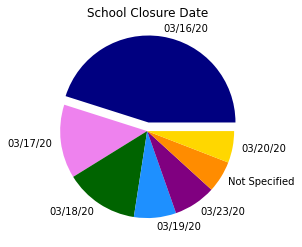

In [38]:
"""CREATING VISUALIZATION #1: Using a forloop to go through the "School Closure" column to combine similar 
    dates into a dictionary in order to create a pie chart - LAUREN"""

covid19_states1 = covid19_states.copy() #making a copy of the data set
schools_closing_dict = {} #creating a dictionary 
schools_closing = covid19_states1["School Closure Date"] #creating a variable for the info in the "School Closure Date" column

for i in schools_closing: #for looping running through the data in the"School Closure Date" column
    if i not in schools_closing_dict: #if a key in this list is not in the dictionary I created, add it to it and move onto the next, creating a dictioary with the various days schools closed and how many schools closed for certain days
        schools_closing_dict[i] = 1
    else: #if i was in the dictonary, move onto the next date
        schools_closing_dict[i] += 1


colors = ["navy","violet", "darkgreen", "dodgerblue", "purple", "darkorange", "gold"]
explode = [.1,0,0,0,0,0,0]

#creating a bar graph about schools scholsing across US to vizualize when the schools closed, done by Lauren  
covid19_states1["School Closure Date"].value_counts().round().plot(kind = "pie", title="School Closure Date",ylabel = "", colors=colors, explode = explode)
#creating a pie chart of School Closure Date Data 


### Visualization #2
RESEARCH QUESTION: Does income have a linear relationship with Covid-19 infected population in the US?

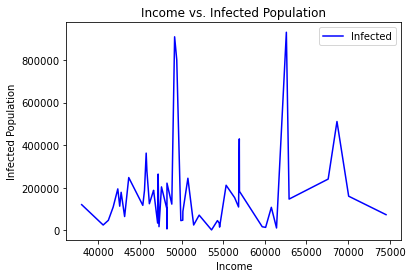

In [39]:
"""CREATING VISUALIZATION #2: Grouping two columns in order to plot the two colums together - LAUREN"""

state_rate = covid19_states1.groupby("Income")[["Infected"]].mean().round() #grouping income and infection rate in teh data set
import matplotlib.pyplot as plt 

state_rate.plot(kind = "line", y = "Infected",title="Income vs. Infected Population", ylabel = "Infected Population", color = "blue") #creating a line graph to show how covid 19 infection rate vary with income
plt.show() #print the graph 

### Visualization #3
RESEARCH QUESTION: Do denser populations have a higher number of ICU Beds as a form of aid?

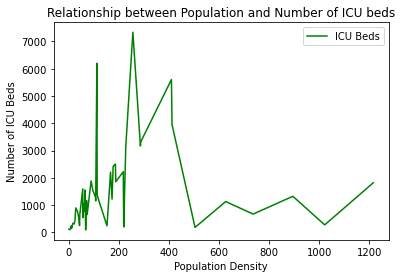

In [40]:
"""CREATING VISUALIZATION #3: Grouping two columns in order to plot the two colums together with a linear graph - LAUREN"""

covid19_states1.drop(covid19_states1[covid19_states1["Pop Density"]>11000].index, inplace = True) #dropping the highest value, clear outlier making the graph harder to read
aid_rate = covid19_states1.groupby("Pop Density")[["ICU Beds"]].mean().round() #variable grouping population density and ICU beds
aid_rate
aid_rate.plot(kind = "line", y = "ICU Beds", title="Relationship between Population and Number of ICU beds", ylabel = "Number of ICU Beds", xlabel = "Population Density", color = "green") #ploting line graph of pop denstiy to ICU Beds in the states
plt.show()

### Visualization #4
RESEARCH QUESTION: What five U.S states have the greatest infected population?

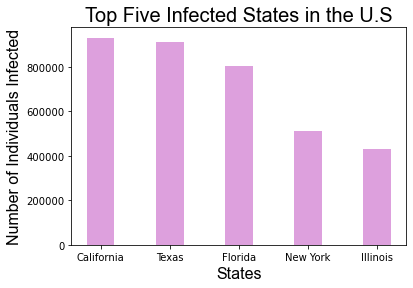

In [44]:
"""CREATING VISUALIZATION #4: The "States" and "Infected" columns were made into lists, and then into dictionaries.
     The dictionary was ordered in descending order based on the value of the dictionary. The top five key-value pairs were 
     used to make the bar graph - GAYATHRI"""

covid19_states2 = covid19_states.copy() #creating a copy of the initial csv file

state_key = covid19_states2["State"].tolist() #creating a list where the column "State" is added to the list state_key
infection_value = covid19_states2["Infected"].tolist() #creating a list where the column "Infected" is added to the list infection_value

dict_infected = {} #creating an empty dictionary to add state_key as a key and infection_value as a value

for key in state_key: #the key of dict_infected is set to the state_key list
    for value in infection_value: #the value of dict_infected is set to the infection_value list
        dict_infected[key] = value #key is set to a value
        infection_value.remove(value) #once a value has been added to the dictionary, the value is removed from the list so that the rest of the values can rotate in
        break
#the following source helped write the code above - https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

#in order to figure out the top five infected states, we wanted the dictionary to be sorted from highest infected population to lowest infected population
sorted_dict = sorted(dict_infected.items(), key=lambda x:x[1], reverse=True) #a new dictionary is set to the sorted dict_infection. The reverse = True indicates that the dictionary will be sorted in descending order)
converted_dict = dict(sorted_dict)
#the following source helped write the code above - https://www.freecodecamp.org/news/sort-dictionary-by-value-in-python/

import itertools #importing itertools in order to use a function that splices dictionaries

sliceddict = dict(itertools.islice(converted_dict.items(), 0 ,5)) #the dictionary is spliced in order to contain just the five states
#learned how to splice dictionaries using this source - https://www.geeksforgeeks.org/python-slice-till-k-dictionary-value-lists

import matplotlib.pyplot as plt #importing matplotlib.pyplot in order to make a bar graph

k = sliceddict.keys() #the key of sliceddict is set to the variable x
v = sliceddict.values() #the value of sliceddict is set to the variable y

font1 = {'family':'arial','color':'black','size':20} #creating a variable called font 1 with a specific font size
font2 = {'family':'arial','color':'black','size':16}

plt.bar(k, v, color = "plum", width = 0.4)
plt.title("Top Five Infected States in the U.S", fontdict = font1)
plt.xlabel("States", fontdict = font2)
plt.ylabel("Number of Individuals Infected", fontdict = font2)
plt.show()


### Visualization #5
RESEARCH QUESTION: Is there a correlation between the average income and the average health spending in the US?

[[1.        0.4561345]
 [0.4561345 1.       ]]


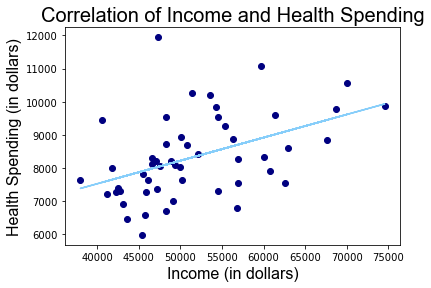

In [42]:
"""CREATING VISUALIZATION #5: The "Income" and "Health Spending" columns were made into lists and plotted 
    as x and y values to make a scatter plot. Numpy was imported in order to make a line of best fit - GAYATHRI"""

import numpy as np #importing numpy to have access to functions that would enable the graphing of a line of best fit

income_key = covid19_states2["Income"].tolist() #creating a list where the column "Income" is added to the list income_key
spending_value = covid19_states2["Health Spending"].tolist() #creating a list where the column "Health Spending" is added to the list spending_value

x = np.array(income_key) #defining the x axis
y = np.array(spending_value) #defining the y axis

a, b = np.polyfit(x, y, 1) #this is code that finds the line of best fit
#in order to make the line of best fit, this source was used for reference:  https://www.statology.org/line-of-best-fit-python/

plt.scatter(income_key, spending_value, color = "navy") #plotting the scatter plot where the x-axis is the income_key and the y-axis is the "Health Spending"

font1 = {'family':'arial','color':'black','size':20} #creating a variable called font 1 with a specific font size
font2 = {'family':'arial','color':'black','size':16}

plt.title("Correlation of Income and Health Spending", fontdict = font1)
plt.xlabel("Income (in dollars)", fontdict = font2)
plt.ylabel("Health Spending (in dollars)", fontdict = font2)
plt.plot(x, a*x+b, color = "lightskyblue")

print(np.corrcoef(x, y)) #printing the R value to see if it has a small, medium or large correlation

#Since the R value is 0.46, there is a medium correlation between Income and Health Spending. Based on the chart in this website: https://www.questionpro.com/blog/pearson-correlation-coefficient/

### Visualization #6
RESEARCH QUESTION: What was the average percentage of infection rates within each age category?

32.35294117647059
37.64705882352939
29.901960784313726


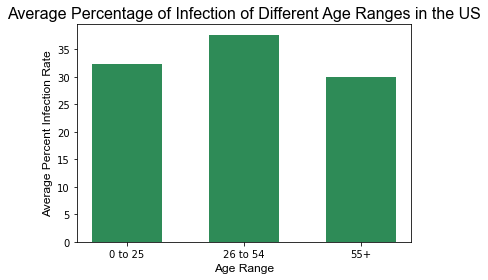

In [43]:
"""CREATING VISUALIZATION #6: The "Age 0-25", "Age 26-54", ""Age 55+"" columns were made into lists in order to plot bar graphs.
    A function was created that would be able to take the sum of all the values in the list and divide it by the length
    of the list- GAYATHRI"""

age_0_25 = covid19_states2["Age 0-25"].tolist() #creating a list where the column "State" is added to the list state_key
age_26_54 = covid19_states2["Age 26-54"].tolist() #creating a list where the column "Infected" is added to the list infection_value
age_55plus = covid19_states2["Age 55+"].tolist() #creating a list where the column "Infected" is added to the list infection_value

def avg_function(a): #creating a function called avg_function
    return ((sum(a)/len(a))*100) #this function is responsible of take the sum of the list and diving it by the length of the list

print(avg_function(age_0_25)) #printing the average of the list age_0_25 to see if the above function worked
print(avg_function(age_26_54))
print(avg_function(age_55plus))

range_list = ["0 to 25", "26 to 54", "55+"] #creating the x-axis as a list, these will act as the axis lables
avg_list = [avg_function(age_0_25), avg_function(age_26_54), avg_function(age_55plus)] #the averages of each list functions as the y-list

fonta = {'family':'arial','color':'black','size':16} #creating a variable called font a with a specific font size
fontb = {'family':'arial','color':'black','size':12}

plt.bar(range_list, avg_list, color = "seagreen", width = 0.6)#creating a bar graph that sets the x-axis to the range_list and the y-axis as the avg_list
plt.title("Average Percentage of Infection of Different Age Ranges in the US", fontdict = fonta) #creating a title with a specific font and font size
plt.xlabel("Age Range", fontdict = fontb) #making an x-axis label with a specific font
plt.ylabel("Average Percent Infection Rate", fontdict = fontb) #making an y-axis label with a specific font
plt.show()